### Content List

##### Step 1 - Import Necessary Data
##### Step 2 - Consider PII
##### Step 3 - Create  Regional Segmentation
       Create region column based on state column
       Determine if there is a difference in spending habits between the different regions
##### Step 4 - Customer Activity Flag
##### Step 5 - Profiling Columns
        Age Profile
        Income Profile
        Departments Profiles
            Pets
            Baby
        Dependants Profile
##### Step 6 - Visualizations
        Age Profile Visualization
        Income Profile Visualization
        Pets Visualization
        Baby Visualization
        Dependants Profile
##### Step 7 - Aggregate Max, Mean, and Min for Usage Frequency and Expenditure
        Age Aggregation
        Income Aggregation
        Pets Aggregation
        Baby Aggregation
        Dependants Aggregation
##### Step 8 - Compare Customer Profiles with Region and Departments
        Age
        Income
        Pets
        Baby
        Dependants
##### Step 9 - Export Visualizations
##### Step 10 - Export Final Data Set

# Step 1 - Import Necessary Data

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create shortcut
path=r'/Users/coley/Desktop/Data Analyst School/Achievement 4/Instacart Basket Analysis'

In [3]:
#import dataframe from pickle file
customers=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders.pkl'))

# Step 2 - Consider PII

In [4]:
#check the information found in dataframe for personally identifiable information
customers.head()

,user_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [5]:
#since not all columns were listed above in order to check for personally identifiable information
customers.columns

Index(['user_id', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'Unnamed: 0',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'frequency', 'order_frequency_flag'],
      dtype='object')

personally identifiable information (PII) data found in the dataframe would be First and Last names of customers, the state they live in, along with their gender and age (which if just listed without the first and last names wouldn;t be as identifiable)

In [6]:
#remove PII (first names)
customers = customers.drop(columns=['First Name'])

In [7]:
#remove PII (last names)
customers = customers.drop(columns=['Last Name'])

In [8]:
customers.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Mid-range product,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Low-range product,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Low-range product,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


# Step 3 - Create Regional Segmentation

## Create region column based on state column

In [9]:
#list all states
customers['State'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
#create Region column based on State column
result = []

for value in customers ['State']:
    if (value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii'):
        result.append('West')
    else:
        result.append('Error')

In [11]:
#create Region column and place result info in column
customers['Region'] = result

In [12]:
#check region column values
customers['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [13]:
#check Region column is showing in dataframe
customers.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Regularly busy,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


## Determine if there is a difference in spending habits between the different regions

In [14]:
#create crosstab in order to compare regions to spending flag
crosstab = pd.crosstab(customers['Region'], customers['spending_flag'], dropna = False)

In [15]:
#view results of crosstab
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,155975,7441350
Northeast,108200,5614536
South,209610,10582275
West,160328,8132585


The South has both the most High Spenders and most Low Spenders which may be because the majority of customers live in that region. The lowest High Spenders are in the Northeast and the lowest Low Spenders are also in the Northeast, showing that many customers do not live in that region. While the Midwest and West seem to be fairly similar in both High Spending and Low Spending.

# Step 4 - Customer Activity Flag

In [16]:
#check dataframe shape in order to compare after excluding low activity customers
customers.shape

(32404859, 34)

In [17]:
#create customer activty flag
customers.loc[customers['order_number'] <5,'Customer_Activity'] = 'Low Activity'

In [18]:
#create customer activity flag
customers.loc[customers['order_number'] >=5,'Customer_Activity'] = 'High Activity'

In [19]:
#view customer activity column values
customers['Customer_Activity'].value_counts(dropna=False)

High Activity    24414877
Low Activity      7989982
Name: Customer_Activity, dtype: int64

In [20]:
#create sample of low activity customers
low_activity = customers[customers.Customer_Activity == 'Low Activity']

In [21]:
#check shape of new sample for low activity customers
low_activity.shape

(7989982, 35)

In [22]:
#export low activity customers sample
low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [23]:
#create updated dataframe to exclude low activity customers without overriding original data
customers_updated = customers[customers.Customer_Activity == 'High Activity']

In [24]:
#check shape of customer_updated to be sure low activty customers were excluded
customers_updated.shape

(24414877, 35)

In [25]:
#check Customer Activity column is shpwing in dataframe
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,busiest days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Regular days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Busiest days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity


# Step 5 - Profiling Columns

## Age Profile

In [26]:
#check age max
customers_updated['Age'].max()

81

In [27]:
#check age min
customers_updated['Age'].min()

18

with a min of 18 and and max of 81 - the age ranges will be:
'young' = 18-39
'middle aged' = 40-60
'senior' - 61-81

In [28]:
#create Age Profile column based on Age column and run loc for each age range
customers_updated.loc[customers_updated['Age'] <40, 'Age_Profile'] = 'Young'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [29]:
#create Age Profile column based on Age column and run loc for each age range
customers_updated.loc[(customers_updated['Age'] <= 60) & (customers_updated['Age'] >=40), 'Age_Profile'] = 'Middle Age'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
#create Age Profile column based on Age column and run loc for each age range
customers_updated.loc[customers_updated['Age'] >60, 'Age_Profile'] = 'Senior'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
#view Age Profile column values
customers_updated['Age_Profile'].value_counts(dropna=False)

Young         8418975
Middle Age    8027043
Senior        7968859
Name: Age_Profile, dtype: int64

In [32]:
#check Age Profile column is showing in data frame
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity,Age_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age


## Income Profile

In [33]:
#check income max
customers_updated['income'].max()

593901

In [34]:
#check income min
customers_updated['income'].min()

25903

since the min is 25,903 and the max is 593,901 - the ranges for the income profile will be 'low income' = <=45,000, 'middle income' = >45,000 to <=80,000 and 'high income' = >80,000

In [35]:
#create Income Profile column based on Income column and run loc for each income range
customers_updated.loc[customers_updated['income'] <=45000, 'Income_Profile'] = 'Low Income'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [36]:
#create Income Profile column based on Income column and run loc for each income range
customers_updated.loc[(customers_updated['income'] <= 80000) & (customers_updated['income'] >45000), 'Income_Profile'] = 'Middle Income'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [37]:
#create Income Profile column based on Income column and run loc for each income range
customers_updated.loc[customers_updated['income'] >80000, 'Income_Profile'] = 'High Income'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [38]:
#view Income Profile column values
customers_updated['Income_Profile'].value_counts(dropna=False)

High Income      15786239
Middle Income     6687360
Low Income        1941278
Name: Income_Profile, dtype: int64

In [39]:
#check Income Profile column is showing in data frame
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity,Age_Profile,Income_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income


## Department Profiles

In [40]:
#import department name/id info in order to choose which to create profiles on
departments=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','department_list.pkl'))

In [41]:
#show department list in order to choose which to create profiles on
departments

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


### Pets Profile

In [42]:
#create Pets Profile column based on department_id column=8 and run loc for equals 8
customers_updated.loc[customers_updated['department_id'] == 8, 'Pet_Profile'] = 'Pet Owner'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [43]:
#create Pets Profile column based on department_id column=8 and run loc for does not equal 8
customers_updated.loc[customers_updated['department_id'] != 8, 'Pet_Profile'] = 'No Pets'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [44]:
#view Pet Profile column values
customers_updated['Pet_Profile'].value_counts(dropna=False)

No Pets      24342766
Pet Owner       72111
Name: Pet_Profile, dtype: int64

In [45]:
#check Pet Profile column is showing in data frame
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity,Age_Profile,Income_Profile,Pet_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets


### Baby Profile

In [46]:
#create Baby Profile column based on department_id column=18 and run loc for equals 18
customers_updated.loc[customers_updated['department_id'] == 18, 'Baby_Profile'] = 'Baby Household'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [47]:
#create Baby Profile column based on department_id column=18 and run loc for does not equal 18
customers_updated.loc[customers_updated['department_id'] != 18, 'Baby_Profile'] = 'Non-Baby Household'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [48]:
#view Baby Profile column values
customers_updated['Baby_Profile'].value_counts(dropna=False)

Non-Baby Household    24078930
Baby Household          335947
Name: Baby_Profile, dtype: int64

In [49]:
#check Baby Profile column is showing in data frame
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,spending,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity,Age_Profile,Income_Profile,Pet_Profile,Baby_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,7.988889,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household


## Dependants Profile

In [50]:
#check dependants max
customers_updated['n_dependants'].max()

3

In [51]:
#check dependants min
customers_updated['n_dependants'].min()

0

since the min is 0 and the max is 3 - 'single' = 0, 'family' = >0

In [52]:
#create Dependants Profile column based on n_dependants column and run loc for each
customers_updated.loc[customers_updated['n_dependants'] == 0, 'Dependants_Profile'] = 'Single'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
#create Dependants Profile column based on n_dependants column and run loc for each
customers_updated.loc[customers_updated['n_dependants'] > 0, 'Dependants_Profile'] = 'Family'

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
#view Dependants Profile column values
customers_updated['Dependants_Profile'].value_counts(dropna=False)

Family    18309875
Single     6105002
Name: Dependants_Profile, dtype: int64

In [55]:
#check Dependants Profile column is showing in data frame
customers_updated.head()

,user_id,Gender,State,Age,date_joined,n_dependants,fam_status,income,Unnamed: 0,product_id,...,spending_flag,frequency,order_frequency_flag,Region,Customer_Activity,Age_Profile,Income_Profile,Pet_Profile,Baby_Profile,Dependants_Profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household,Family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household,Family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household,Family
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household,Family
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Low Spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,No Pets,Non-Baby Household,Family


# Step 6 - Visualizations

## Age Profile Visualization

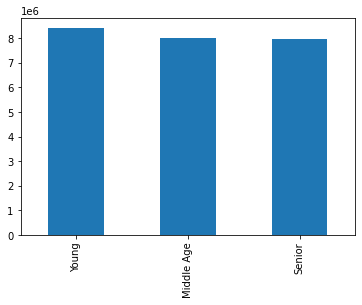

In [56]:
#create bar chart for amounts in Age Profile
bar_age = customers_updated['Age_Profile'].value_counts().plot.bar()

## Income Visualization

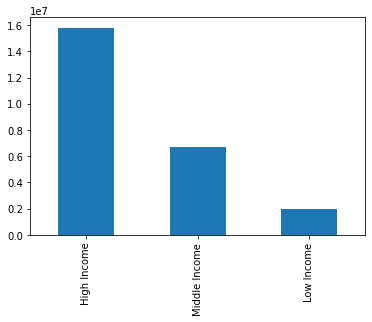

In [57]:
#create bar chart for amounts in Income Profile
bar_income = customers_updated['Income_Profile'].value_counts().plot.bar()

## Pets Profile Visualization

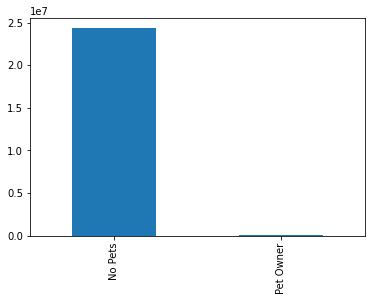

In [58]:
#create bar chart for amounts in Pet Profile
bar_pets = customers_updated['Pet_Profile'].value_counts().plot.bar()

## Baby Profile Visualization

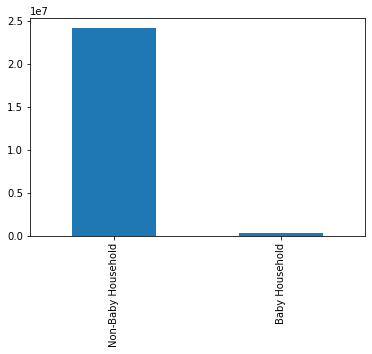

In [59]:
#create bar chart for amounts in Baby Profile
bar_baby = customers_updated['Baby_Profile'].value_counts().plot.bar()

## Dependants Profile Visualization

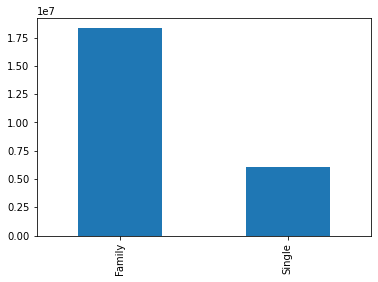

In [60]:
#create bar chart for amounts in Dependants Profile
bar_dep = customers_updated['Dependants_Profile'].value_counts().plot.bar()

# Step 7 - Aggregate Max, Mean, and Min for Usage Frequency and Expenditure.

## Region Aggregation

In [61]:
#group by Region in order to aggregate order number to see usage frequency
customers_updated.groupby('Region').agg({'order_number':['max', 'mean', 'min']})

order_number               
                   max       mean min
Region                               
Midwest             99  21.702417   5
Northeast           99  22.031923   5
South               99  21.965822   5
West                99  22.098505   5

In [62]:
#group by Region in order to aggregate spending to see expenditure
customers_updated.groupby('Region').agg({'spending':['max', 'mean', 'min']})

spending                   
                    max       mean     min
Region                                    
Midwest     8794.882427  12.642156  1.0000
Northeast   7414.485185  11.288711  1.1000
South      15006.940000  11.903703  1.2625
West       10209.987755  10.966308  1.0000

## Age Aggregation

In [63]:
#group by Age Profile in order to aggregate order number to see usage frequency
customers_updated.groupby('Age_Profile').agg({'order_number':['max', 'mean', 'min']})

order_number               
                     max       mean min
Age_Profile                            
Middle Age            99  21.928570   5
Senior                99  21.951108   5
Young                 99  21.969082   5

In [64]:
#group by Age Profile in order to aggregate spending to see expenditure
customers_updated.groupby('Age_Profile').agg({'spending':['max', 'mean', 'min']})

spending                   
                      max       mean     min
Age_Profile                                 
Middle Age   15006.940000  11.756898  1.0000
Senior       14042.512281  11.647220  1.2625
Young        10209.987755  11.775345  1.0000

## Income Aggregation

In [65]:
#group by Income Profile in order to aggregate order number to see usage frequency
customers_updated.groupby('Income_Profile').agg({'order_number':['max', 'mean', 'min']})

order_number               
                        max       mean min
Income_Profile                            
High Income              99  21.984792   5
Low Income               99  21.086451   5
Middle Income            99  22.118170   5

In [66]:
#group by Income Profile in order to aggregate spending to see expenditure
customers_updated.groupby('Income_Profile').agg({'spending':['max', 'mean', 'min']})

spending                
                         max       mean  min
Income_Profile                              
High Income     15006.940000  14.034191  7.0
Low Income         11.857143   6.629126  1.0
Middle Income      22.256974   7.762172  1.1

## Pets Aggregation

In [67]:
#group by Pet Profile in order to aggregate order number to see usage frequency
customers_updated.groupby('Pet_Profile').agg({'order_number':['max', 'mean', 'min']})

order_number               
                     max       mean min
Pet_Profile                            
No Pets               99  21.955925   5
Pet Owner             99  19.914645   5

In [68]:
#group by Pet Profile in order to aggregate spending to see expenditure
customers_updated.groupby('Pet_Profile').agg({'spending':['max', 'mean', 'min']})

spending                     
                      max       mean       min
Pet_Profile                                   
No Pets      15006.940000  11.720177  1.000000
Pet Owner     6390.138298  14.186234  3.954545

## Baby Aggregation

In [69]:
#group by Baby Profile in order to aggregate order number to see usage frequency
customers_updated.groupby('Baby_Profile').agg({'order_number':['max', 'mean', 'min']})

order_number               
                            max       mean min
Baby_Profile                                  
Baby Household               99  23.714705   5
Non-Baby Household           99  21.925274   5

In [70]:
#group by Baby Profile in order to aggregate spending to see expenditure
customers_updated.groupby('Baby_Profile').agg({'spending':['max', 'mean', 'min']})

spending                     
                             max       mean       min
Baby_Profile                                         
Baby Household       4357.073913  10.038640  3.128571
Non-Baby Household  15006.940000  11.751023  1.000000

## Dependants Aggregation

In [71]:
#group by Dependants Profile in order to aggregate order number to see usage frequency
customers_updated.groupby('Dependants_Profile').agg({'order_number':['max', 'mean', 'min']})

order_number               
                            max       mean min
Dependants_Profile                            
Family                       99  21.900123   5
Single                       99  22.099175   5

In [72]:
#group by Dependants Profile in order to aggregate spending to see expenditure
customers_updated.groupby('Dependants_Profile').agg({'spending':['max', 'mean', 'min']})

spending                
                             max       mean  min
Dependants_Profile                              
Family              10209.987755  11.680437  1.0
Single              15006.940000  11.868494  1.0

# Step 8 - Compare Customer Profiles with Region and Departments

## Age

In [73]:
#create crosstab in order to compare Age Profile by Region
crosstab_age_region=pd.crosstab(customers_updated['Region'],customers_updated['Age_Profile'], dropna=False )

In [74]:
#view crosstab
crosstab_age_region

Age_Profile,Middle Age,Senior,Young
Region,,,
Midwest,1908207,1848183,1955366
Northeast,1405921,1429900,1479450
South,2629048,2649272,2850766
West,2083867,2041504,2133393


the south region contains the highest populations in all age groups while the northeast region contains the smallest populations in all age groups

In [75]:
#create crosstab in order to compare Age Profile by Department ID
crosstab_age_dep=pd.crosstab(customers_updated['department_id'],customers_updated['Age_Profile'], dropna=False )

In [76]:
#view crosstab
crosstab_age_dep

Age_Profile,Middle Age,Senior,Young
department_id,,,
1,535263,535510,556841
2,8884,8732,9550
3,290467,288338,304525
4,2373614,2359636,2493841
5,35309,33910,38753
6,65484,63677,68739
7,674306,669721,692420
8,23611,23877,24623
9,208857,206092,218776


all age groups purchase the most from the produce department and purchase the least in the other department - this shows that no matter the age, customers tend to purchase from the same areas

## Income

In [77]:
#create crosstab in order to compare Income Profile by Region
crosstab_income_region=pd.crosstab(customers_updated['Region'],customers_updated['Income_Profile'], dropna=False )

In [78]:
#view crosstab
crosstab_income_region

Income_Profile,High Income,Low Income,Middle Income
Region,,,
Midwest,3722513,439198,1550045
Northeast,2817171,344532,1153568
South,5217943,662387,2248756
West,4028612,495161,1734991


the south contains the highest amount of customers in all income levels, while the northeast contains the lowest - this shows (just like the age results above) that the south most likely has the highest amount of customers/population

In [79]:
#create crosstab in order to compare Income Profile by Department ID
crosstab_income_dep=pd.crosstab(customers_updated['department_id'],customers_updated['Income_Profile'], dropna=False )

In [80]:
#view crosstab
crosstab_income_dep

Income_Profile,High Income,Low Income,Middle Income
department_id,,,
1,1069133,119405,439076
2,17669,2258,7239
3,584472,59683,239175
4,4765175,471764,1990152
5,71550,9389,27033
6,131984,11971,53945
7,1251139,228744,556564
8,48552,5267,18292
9,427478,34612,171635


just like how the results in the age profile vs departments - no matter the income level, the produce department has the highest customers, and the other department has the least customers

## Pets

In [81]:
#create crosstab in order to compare Pet Profile by Region
crosstab_pet_region=pd.crosstab(customers_updated['Region'],customers_updated['Pet_Profile'], dropna=False )

In [82]:
#view crosstab
crosstab_pet_region

Pet_Profile,No Pets,Pet Owner
Region,,
Midwest,5695275,16481
Northeast,4301191,14080
South,8106074,23012
West,6240226,18538


this shows the majority of households no matter the region do not have pets - the highest ranking region with pet owners is the south and the lowest ranking with pet owners is the northeast (which follows the same pattern as stated above - that the south most likely has a higher population compared to the other regions and the northeast most likely has the lowest population compared to the other region)

In [83]:
#create crosstab in order to compare Pet Profile by Department ID
crosstab_pet_dep=pd.crosstab(customers_updated['department_id'],customers_updated['Pet_Profile'], dropna=False )

In [84]:
#view crosstab
crosstab_pet_dep

Pet_Profile,No Pets,Pet Owner
department_id,,
1,1627614,0
2,27166,0
3,883330,0
4,7227091,0
5,107972,0
6,197900,0
7,2036447,0
8,0,72111
9,633725,0


this information is a bit skewed since the pet profile was figured out by using the department id - so it will show pet owners shopping in the pet department while non pet owners shop in every department but pets

## Baby

In [85]:
#create crosstab in order to compare Baby Profile by Region
crosstab_baby_region=pd.crosstab(customers_updated['Region'],customers_updated['Baby_Profile'], dropna=False )

In [86]:
#view crosstab
crosstab_baby_region

Baby_Profile,Baby Household,Non-Baby Household
Region,,
Midwest,78496,5633260
Northeast,59555,4255716
South,113970,8015116
West,83926,6174838


same pattern is still appearing as stated above - the south has both the most baby households and non-baby households, while the northeast has the least baby households and non-baby households, which can be a population size factor

In [87]:
#create crosstab in order to compare Baby Profile by Department ID
crosstab_baby_dep=pd.crosstab(customers_updated['department_id'],customers_updated['Baby_Profile'], dropna=False )

In [88]:
#view crosstab
crosstab_baby_dep

Baby_Profile,Baby Household,Non-Baby Household
department_id,,
1,0,1627614
2,0,27166
3,0,883330
4,0,7227091
5,0,107972
6,0,197900
7,0,2036447
8,0,72111
9,0,633725


this information is aalso a bit skewed since the baby profile was figured out by using the department id - so it will show baby household customers shopping in the baby department while non-baby households shop in every department but the baby department

## Dependants

In [89]:
#create crosstab in order to compare Dependants Profile by Region
crosstab_depen_region=pd.crosstab(customers_updated['Region'],customers_updated['Dependants_Profile'], dropna=False )

In [90]:
#view crosstab
crosstab_depen_region

Dependants_Profile,Family,Single
Region,,
Midwest,4274795,1436961
Northeast,3250133,1065138
South,6090752,2038334
West,4694195,1564569


the south contains the highest for both single and family households, while the northeast contains the least for both single and family households

In [91]:
#create crosstab in order to compare Dependants Profile by Department ID
crosstab_depen_dep=pd.crosstab(customers_updated['department_id'],customers_updated['Dependants_Profile'], dropna=False )

In [92]:
#view crosstab
crosstab_depen_dep

Dependants_Profile,Family,Single
department_id,,
1,1222101,405513
2,20231,6935
3,661731,221599
4,5414206,1812885
5,80013,27959
6,147862,50038
7,1524392,512055
8,53861,18250
9,476311,157414


for departments, both single and family households make most purchases from the produce department, but single households purchase the least in the bulk department, while family households make the least purchases in the other department

after looking at each crosstab and comparing regions, there is a trend that the south has the highest purchases no matter the customer profile and the northeast has the least - this could be do to population size per region - the marketing team could focus on trying to gain more customers in the regions that have less if it is not a population size issue

after looking at each crosstab and seeing what areas items are purchased in the most, shows a pattern of produce being the highest and other department being the lowest except for in the single households that made the least purchases in the bulk department - this can show the marketing team that no matter the customer profile there are similarities the purchases customers make

# Step 9 - Export Visualizations

In [93]:
#export Age Profile Bar Chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'age_profile_bar_chart.png'))

In [94]:
#export Income Profile Bar Chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'income_profile_bar_chart.png'))

In [95]:
#export Pet Profile Bar Chart
bar_pets.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'pet_profile_bar_chart.png'))

In [96]:
#export Baby Profile Bar Chart
bar_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'baby_profile_bar_chart.png'))

In [97]:
#export Dependants Profile Bar Chart
bar_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'dependants_profile_bar_chart.png'))

# Step 10 - Export Final Data Set

In [98]:
customers_updated.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_with_profiles.pkl'))